## Libraries

In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D 

## Suppressing disturbance with proportional controller

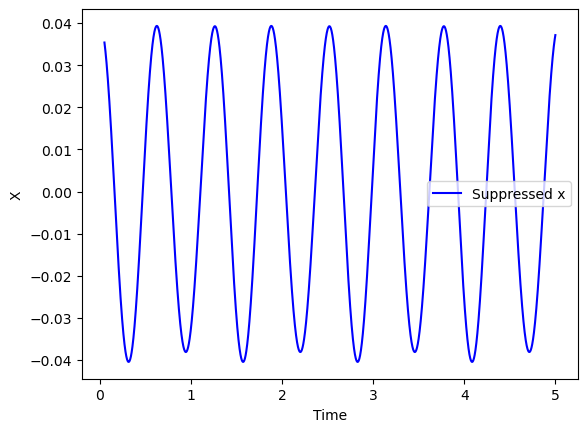

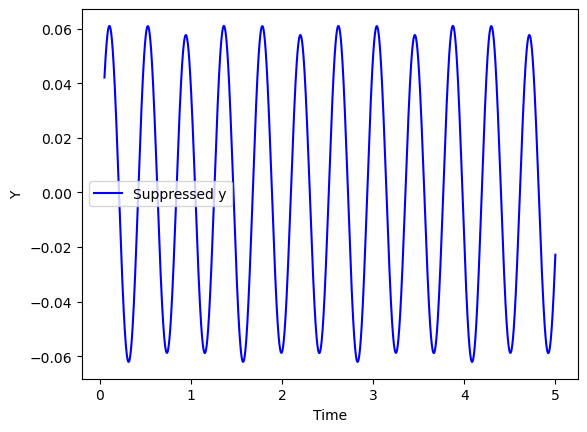

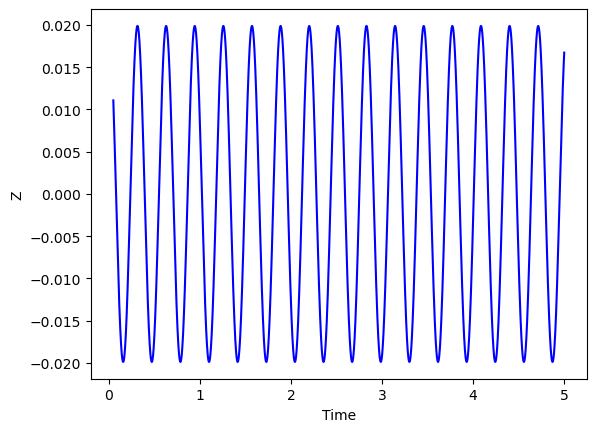

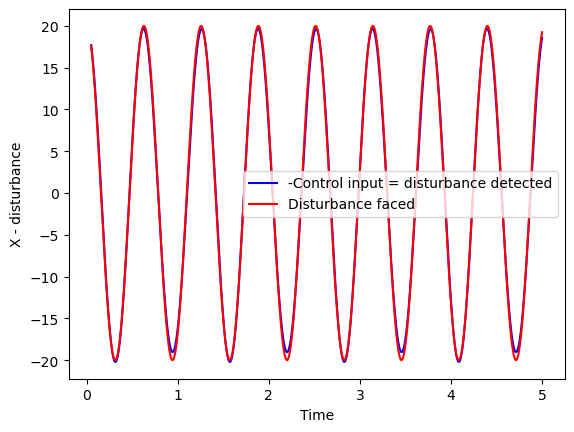

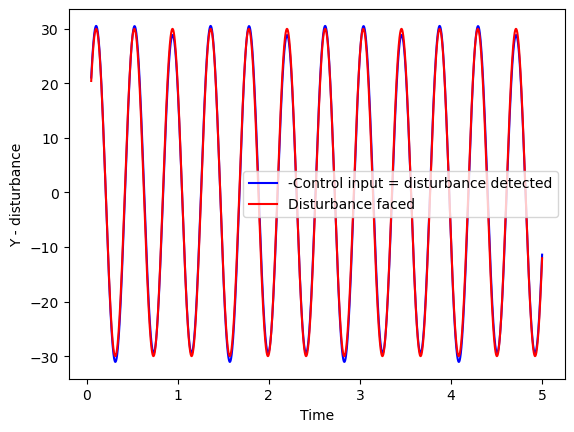

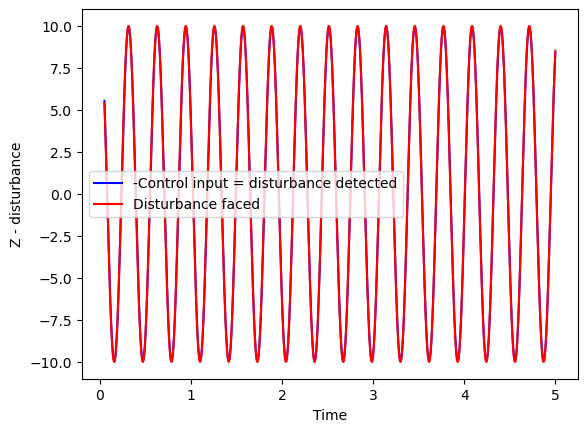

In [3]:
## Lorenz system parameters 
sigma = 10
rho = 28
beta = 8/3

### Testing delayed control with altered rho ###
Ttest = 10
dt = 0.001
ntest = int(Ttest / dt)
testingtimes = np.linspace(0, Ttest, ntest + 1)

gx = np.zeros(ntest)    # Disturbance in x
ux = np.zeros(ntest)    # Control input in x

gy = np.zeros(ntest)
uy = np.zeros(ntest)

gz = np.zeros(ntest)
uz = np.zeros(ntest)

## Storing x, y, z  if there was no disturbance
xpure = np.zeros(ntest)
ypure = np.zeros(ntest)
zpure = np.zeros(ntest)

## Storing x, y, z when there is disturbance and control is not applied
xnocontrol = np.zeros(ntest)
ynocontrol = np.zeros(ntest)
znocontrol = np.zeros(ntest)

## Storing x, y, z when trying to suppress the system
xsupp = np.zeros(ntest)
ysupp = np.zeros(ntest)
zsupp = np.zeros(ntest)


## Suppression gain
k = 500

## Initial conditions
xxpure, yypure, zzpure = -7.45, -3.03, 0.01
xxnocontrol, yynocontrol, zznocontrol = -7.45, -3.03, 0.01
xxsupp, yysupp, zzsupp = -7.45, -3.03, 0.01


for t in range(ntest):

    ## No disturbance or control

    xxpurep = sigma * (yypure - xxpure)
    yypurep = xxpure * (rho - zzpure) - yypure
    zzpurep = xxpure * yypure - beta * zzpure

    xxpure += dt * xxpurep
    yypure += dt * yypurep
    zzpure += dt * zzpurep

    xpure[t] = xxpure
    ypure[t] = yypure
    zpure[t] = zzpure    
    

    ## Disturbance
    # Disturbance functions - can be set to anything arbitrary    
    gx[t] = 20 * np.cos(10 * dt * t)        
    gy[t] = 30 * np.sin(15 * dt * t)
    gz[t] = 10 * np.cos(20 * dt * t)

    # Disturbance but no control
    xxnocontrolp = sigma * (yynocontrol - xxnocontrol) + gx[t]
    yynocontrolp = xxnocontrol * (rho - zznocontrol) - yynocontrol + gy[t]
    zznocontrolp = xxnocontrol * yynocontrol - beta * zznocontrol + gz[t]
    
    xxnocontrol += dt * xxnocontrolp
    yynocontrol += dt * yynocontrolp
    zznocontrol += dt * zznocontrolp

    xnocontrol[t] = xxnocontrol
    ynocontrol[t] = yynocontrol
    znocontrol[t] = zznocontrol

    ## Disturbance but control such that system states are suppressed to 0
    xxsuppp = sigma * (yysupp - xxsupp) + gx[t]
    yysuppp = xxsupp * (rho - zzsupp) - yysupp + gy[t]
    zzsuppp = xxsupp * yysupp - beta * zzsupp + gz[t]

    xxsupp += dt * (xxsuppp + k * (-xxsupp))
    yysupp += dt * (yysuppp + k * (-yysupp))
    zzsupp += dt * (zzsuppp + k * (-zzsupp))

    xsupp[t] = xxsupp
    ysupp[t] = yysupp
    zsupp[t] = zzsupp

    ux[t] =  - k * xxsupp
    uy[t] =  - k * yysupp
    uz[t] =  - k * zzsupp


plottimerange = np.arange(50, 5000)


## Plotting x, y and z time series when trying to suppress the disturbance
plt.figure()
plt.plot(testingtimes[plottimerange], xsupp[plottimerange],  
         'b', label = 'Suppressed x')
#plt.plot(testingtimes[plottimerange], xpure[plottimerange],  
         #'g', label = 'Undisturbed and uncontrolled x')
#plt.plot(testingtimes[plottimerange], xnocontrol[plottimerange],  
         #'r', label = 'Disturbed and uncontrolled x')
plt.legend()
plt.xlabel('Time')
plt.ylabel('X')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], ysupp[plottimerange],  
         'b', label = 'Suppressed y')
#plt.plot(testingtimes[plottimerange], ypure[plottimerange],  
        # 'g', label = 'Undisturbed and uncontrolled y')
#plt.plot(testingtimes[plottimerange], ynocontrol[plottimerange],  
        # 'r', label = 'Disturbed and uncontrolled y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], zsupp[plottimerange],  
         'b', label = 'Suppressed z')
# plt.plot(testingtimes[plottimerange], zpure[plottimerange],  
#          'g', label = 'Undisturbed and uncontrolled z')
# plt.plot(testingtimes[plottimerange], znocontrol[plottimerange],  
#          'r', label = 'Disturbed and uncontrolled z')
# plt.legend()
plt.xlabel('Time')
plt.ylabel('Z')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], -ux[plottimerange],  
         'b', label = '-Control input = disturbance detected')
plt.plot(testingtimes[plottimerange], gx[plottimerange],  
         'r', label = 'Disturbance faced')
plt.legend()
plt.xlabel('Time')
plt.ylabel('X - disturbance')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], -uy[plottimerange],  
         'b', label = '-Control input = disturbance detected')
plt.plot(testingtimes[plottimerange], gy[plottimerange],  
         'r', label = 'Disturbance faced')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Y - disturbance')
plt.show()

plt.figure()
plt.plot(testingtimes[plottimerange], -uz[plottimerange],  
         'b', label = '-Control input = disturbance detected')
plt.plot(testingtimes[plottimerange], gz[plottimerange],  
         'r', label = 'Disturbance faced')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Z - disturbance')
plt.show()




We have a lorenz system running with a disturbance. Our aim is to suppress this system so that the states x, y and z are close to 0. 
This detects the disturbance and suppresses it without the use of a reservoir. Mainly because the system here is such that f(0) = 0. So the control input is exactly the same as the disturbance.

\begin{align*}
\dot{x} &= \sigma(y - x) + g_x(t) + (-kx)\\
\dot{y} &= x(\rho - z) - y + g_y(t) + (-ky)\\
\dot{z} &= xy - \beta z + g_z(t) + (-kz)
\end{align*}

If x, y and z are close to zero, we can rewrite the above as:

\begin{align*}
\dot{x} = 0 &=  g_x(t) + (-kx) \implies g_x(t)&= kx\\
\dot{y} = 0 &=  g_y(t) + (-ky) \implies g_y(t)&= ky\\
\dot{z} = 0 &=  g_z(t) + (-kz) \implies g_z(t)&= kz\\

\end{align*}

In the first three plots, there is x, y and z as a function of time. The blue curve is the one that is being controlled so that it's close to 0. This is the one I'm suspicious about - is the intention of the control scheme to push the system close to 0? If so, this feedback control scheme acheives that, while also detecting the disturbance that's applied. The last 3 plots are the disturbance vs the negative of the control input. As you can see, they overlap quite well, meaning the disturbance that's being applied to the system can be detected as the negative of the control input.
